<a href="https://colab.research.google.com/github/fpinto2021/Mechanical-Vibrations/blob/main/Project1Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

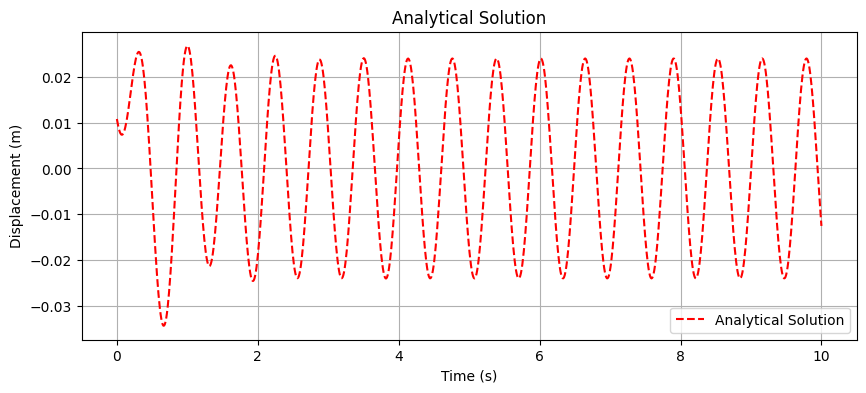

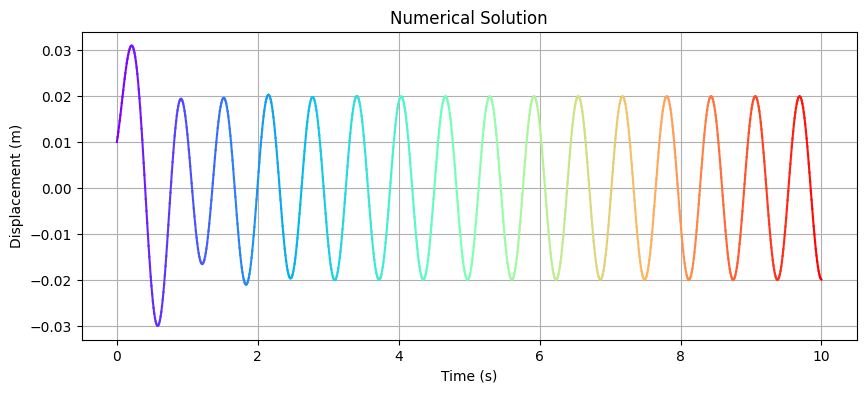

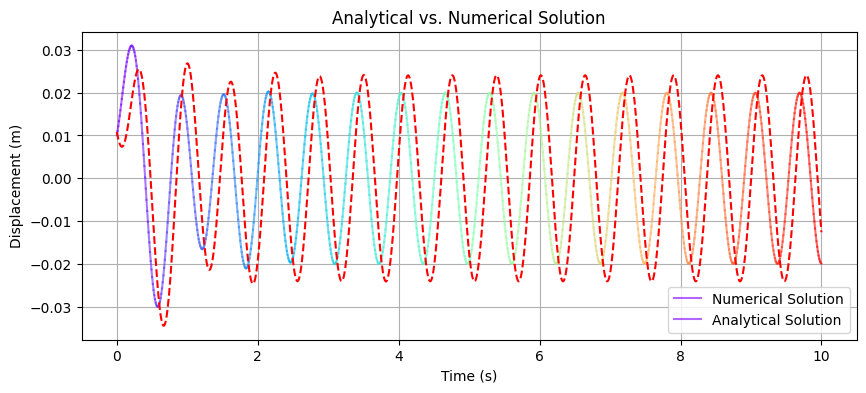

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Given parameters
m = 100
k = 3350
c = 355
F0 = 150
omega = 10

# Time range
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Numerical Solution
def system(t, y):
    x, v = y
    dxdt = v
    dvdt = (F0 * np.cos(omega * t) - c * v - k * x) / m
    return [dxdt, dvdt]

# Initial conditions
x0 = 0.01
v0 = 0.1

# Solving the system numerically
sol = solve_ivp(system, t_span, [x0, v0], t_eval=t_eval)

# Analytical Solution
def analytical_solution(t):
    return (
        np.exp(-1.775 * t) * (0.032 * np.cos(5.63 * t) + 0.014 * np.sin(5.63 * t))
        - 0.0212 * np.cos(10 * t)
        - 0.0113 * np.sin(10 * t)
    )

# Computing analytical solution
x_analytical = analytical_solution(sol.t)

# Plot 1: Analytical Solution
plt.figure(figsize=(10, 4))
plt.plot(sol.t, x_analytical, 'r--', label="Analytical Solution")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Analytical Solution")
plt.legend()
plt.grid()

# Plot 2: Numerical Solution
plt.figure(figsize=(10, 4))
colors = plt.cm.rainbow(np.linspace(0, 1, len(sol.t)))
for i in range(len(sol.t) - 1):
    plt.plot(sol.t[i:i+2], sol.y[0, i:i+2], color=colors[i])

plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Numerical Solution")
plt.grid()

# Plot 3: Comparison
plt.figure(figsize=(10, 4))
for i in range(len(sol.t) - 1):
    plt.plot(sol.t[i:i+2], sol.y[0, i:i+2], color=colors[i], alpha=0.6)
plt.plot(sol.t, x_analytical, 'r--', label="Analytical Solution")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Analytical vs. Numerical Solution")
plt.legend(["Numerical Solution", "Analytical Solution"])
plt.grid()
plt.show()
